<a href="https://colab.research.google.com/github/abir-pramanik/brain-tumor-detection-final-project/blob/main/brain_tumor_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from joblib import dump, load
from google.colab import files
from PIL import Image


In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
IMG_HEIGHT = 100
IMG_WIDTH = 100

TARGET_CLASSES = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
NO_TUMOR_CLASS = 'no_tumor'

train_path = '/content/drive/My Drive/archive/Training'  # ✅ CHANGE this according to your dataset location
test_path = '/content/drive/My Drive/archive/Testing'    # ✅ CHANGE this according to your dataset location


In [16]:
def load_data(data_dir):
    X = []
    y = []
    classes = os.listdir(data_dir)
    for label in classes:
        class_dir = os.path.join(data_dir, label)
        if not os.path.isdir(class_dir):
            continue
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                X.append(img.flatten())
                y.append(label)
            except Exception as e:
                print(f"Skipping {img_file}: {e}")
    return np.array(X), np.array(y)

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

print("✅ Data loaded.")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


✅ Data loaded.
Training samples: 5722, Testing samples: 1311


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train_encoded)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"✅ Model trained with accuracy: {accuracy * 100:.2f}%")


✅ Model trained with accuracy: 85.81%


In [19]:
model_filename = 'brain_tumor_model.joblib'
dump(model, model_filename)
my_loaded_model = load(model_filename)
print("✅ Model saved and loaded successfully.")


✅ Model saved and loaded successfully.


In [20]:
def predict_brain_tumor_from_uploaded_image(model, target_size, class_names, no_tumor_class_name):
    uploaded = files.upload()

    for filename in uploaded.keys():
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("❌ Couldn't read the uploaded image.")
            return

        img_resized = cv2.resize(img, target_size).flatten().reshape(1, -1)
        prediction_index = model.predict(img_resized)[0]
        prediction_label = class_names[prediction_index]

        plt.imshow(img, cmap='gray')
        plt.title(f"Prediction: {prediction_label}")
        plt.axis('off')
        plt.show()

        if prediction_label == no_tumor_class_name:
            print("✅ No brain tumor detected.")
        else:
            print(f"🧠 Detected Tumor Type: **{prediction_label.upper()}**")


Saving Te-gl_0194.jpg to Te-gl_0194.jpg


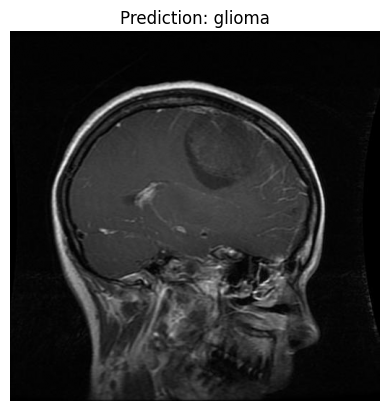

🧠 Detected Tumor Type: **GLIOMA**


In [23]:
if my_loaded_model is not None:
    predict_brain_tumor_from_uploaded_image(
        model=my_loaded_model,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        class_names=TARGET_CLASSES,
        no_tumor_class_name=NO_TUMOR_CLASS
    )
else:
    print("❌ Model couldn't be loaded.")
